In [29]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

#미분치
def sigmoid_deriv(x):
    return x*(1-x)

learning_rate = 0.2

input = [[0,0],[0,1],[1,0],[1,1]]

targets = [1, 0, 0, 1]

#은닉층 1
w1_11 = 0.10
w1_21 = 0.30
b1_1 = 0.1
# 은닉층 2
w1_12 = 0.10
w1_22 = 0.30
b1_2 = 0.1

# 은닉층 2
w1_13 = 0.10
w1_23 = 0.30
b1_3 = 0.1

#출력층
w2_11 = 0.50
w2_21 = 0.60
w2_31 = 0.30
b2 = 0.3


def forward(x):
    global w1_11 ,w1_21 ,b1_1 , w1_12 , w1_22, b1_2, w1_13 , w1_23, b1_3, w2_11 ,w2_21 ,w2_31 ,b2

    x1 , x2 =x
    z1 = x1 * w1_11+ x2 * w1_21 + b1_1
    a1 = sigmoid(z1)

    z2 = x1 * w1_12+ x2 * w1_22 + b1_2
    a2 = sigmoid(z2)

    z3 = x1 * w1_13+ x2 * w1_23 + b1_3
    a3 = sigmoid(z3)

    z_out = a1 * w2_11 + a2 * w2_21+ a3 * w2_31 + b2
    a_out =sigmoid(z_out)

    return a1, a2 , a3, a_out

def backward(x, target ,a1, a2 , a3, a_out):
    global w1_11 ,w1_21 ,b1_1 , w1_12 , w1_22, b1_2, w1_13 , w1_23, b1_3, w2_11 ,w2_21 ,w2_31 ,b2

    x1, x2 = x
    error = a_out - target
    delta_out = error * sigmoid_deriv(a_out)

    delta1 = delta_out * w2_11 * sigmoid_deriv(a1)
    delta2 = delta_out * w2_21 * sigmoid_deriv(a2)
    delta3 = delta_out * w2_31 * sigmoid_deriv(a3)

    w2_11 -= learning_rate * a1 * delta_out
    w2_21 -= learning_rate * a2 * delta_out
    w2_31 -= learning_rate * a3 * delta_out
    b2 -= learning_rate * delta_out

    w1_11 -= learning_rate * x1 * delta1
    w1_21 -= learning_rate * x2 * delta1
    b1_1 -= learning_rate *delta1
    
    w1_12 -= learning_rate * x1 * delta1
    w1_22 -= learning_rate * x2 * delta1
    b1_2 -= learning_rate *delta1

    w1_13 -= learning_rate * x1 * delta1
    w1_23 -= learning_rate * x2 * delta1
    b1_3 -= learning_rate *delta1
    
    

In [65]:
import numpy as np
#은닉층과 출력층의 손실함수 적용 결과에 따른 가중치 수정을 설명

#시그모이드 함수

def actf(x):
    return 1/(1+np.exp(-x))

#미분치
def actf_deriv(x):
    return x*(1-x)

inputs, hiddens, outputs = 2, 2, 1

leraning_rate = 0.2

X = np.array([[0,0],[0,1],[1,0],[1,1]]) #샘플
T = np.array([[0],[1],[0],[1]]) #정답

#가중치
W1 = np.array([[0.1, 0.2],[0.3, 0.4]])
B1 = np.array([[0.1, 0.2]])
W2 = np.array([[0.5],[0.6]])
B2 = np.array([0.3])

def predict(x):
    layer0 = x  #입력을 layer0에 대입
    Z1 = np.dot(layer0, W1) + B1  #행렬의 곱 계산
    layer1 = actf(Z1)
    Z2 = np.dot(layer1, W2) + B2
    layer2 = actf(Z2)
    return layer0, layer1, layer2

#역전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(10):
        for x, y in zip(X, T):
            x = np.reshape(x,(1, -1))
            y = np.reshape(y,(1, -1))

            layer0, layer1, layer2 = predict(x)
            #print(layer0, layer1, layer2)
            layer2_error = layer2-y
            #print(layer2_error)
            layer2_delta = layer2_error*actf_deriv(layer2) #기울기를 계산
            #print(layer2_delta)
            #print(W2.T)
            layer1_error = np.dot(layer2_delta, W2.T)
            #print(layer1_error)
            layer1_delta = layer1_error*actf_deriv(layer1)

            W2 += -leraning_rate*np.dot(layer1.T,layer2_delta)
            W1 += -leraning_rate*np.dot(layer0.T,layer1_delta)
            B2 += -leraning_rate*np.sum(layer2_delta,axis=0)
            B1 += -leraning_rate*np.sum(layer1_delta,axis=0)

def test():
    for x, y in zip(X, T): #X와 T에서 하나씩 가져온다
        x = np.reshape(x, (1, -1))	# 하나의 샘플을 꺼내서 2차원 행렬로 만든다. 
        layer0, layer1, layer2 = predict(x)
        print(layer0, layer1, layer2)
        print(x, y, layer2)		# 출력층의 값을 출력해본다. 

fit()
test()
                                                
            
            
    


    


    


[[0 0]] [[0.51641875 0.53919107]] [[0.60849389]]
[[0 0]] [0] [[0.60849389]]
[[0 1]] [[0.59728802 0.64336071]] [[0.62678539]]
[[0 1]] [1] [[0.62678539]]
[[1 0]] [[0.53707767 0.58314083]] [[0.61508966]]
[[1 0]] [0] [[0.61508966]]
[[1 1]] [[0.61705402 0.68321243]] [[0.63274475]]
[[1 1]] [1] [[0.63274475]]


In [27]:
import numpy as np

epsilon = 0.000001

def step_func(t):
    if t > epsilon: 
        return 1
    else:
        return 0

X = np.array([[0, 0, 1],[0, 1, 1],[1, 0, 1],
            [1, 1, 1]])

y = np.array([0, 1, 1, 0])

W = np.zeros(len(X[0]))
print(W)

def perceptron_fit(X, Y, epochs=100):
    global W

    eta = 0.2 # 학습률
    
    for t in range(epochs):

        print("epoch=", t, "==================")
        for i in range(len(X)):

            predict = step_func(np.dot(X[i],W)) #x랑 w 각 행 값을 곱헤서 더한다고 생각 -> 내적을 구함
            error =  Y[i] - predict
            # print("변경전 가중치 = ",W)
            # print("error=", error)
            # print("X[i] = ",X[i])
            #W += eta * error * X[i]
            Wx = eta * error * X[i]
            #print("변경할 가중치 = ", Wx)
            W = W+Wx

            print("현재 처리 입력=",X[i], "정답=",Y[i], "predict=", predict,"변형된 가중치=",W)
        print("====================")
def perceptron_predict(X, Y):
    global W
    for x in X:
        print(x[0], x[1], "->", step_func(np.dot(x, W)))



perceptron_fit(X, y, 6)
perceptron_predict(X, y)

            
    


[0. 0. 0.]
epoch= 0 ==================
현재 처리 입력= [0 0 1] 정답= 0 predict= 0 변형된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 1 predict= 0 변형된 가중치= [0.  0.2 0.2]
현재 처리 입력= [1 0 1] 정답= 1 predict= 1 변형된 가중치= [0.  0.2 0.2]
현재 처리 입력= [1 1 1] 정답= 0 predict= 1 변형된 가중치= [-0.2  0.   0. ]
epoch= 1 ==================
현재 처리 입력= [0 0 1] 정답= 0 predict= 0 변형된 가중치= [-0.2  0.   0. ]
현재 처리 입력= [0 1 1] 정답= 1 predict= 0 변형된 가중치= [-0.2  0.2  0.2]
현재 처리 입력= [1 0 1] 정답= 1 predict= 0 변형된 가중치= [0.  0.2 0.4]
현재 처리 입력= [1 1 1] 정답= 0 predict= 1 변형된 가중치= [-0.2  0.   0.2]
epoch= 2 ==================
현재 처리 입력= [0 0 1] 정답= 0 predict= 1 변형된 가중치= [-0.2  0.   0. ]
현재 처리 입력= [0 1 1] 정답= 1 predict= 0 변형된 가중치= [-0.2  0.2  0.2]
현재 처리 입력= [1 0 1] 정답= 1 predict= 0 변형된 가중치= [0.  0.2 0.4]
현재 처리 입력= [1 1 1] 정답= 0 predict= 1 변형된 가중치= [-0.2  0.   0.2]
epoch= 3 ==================
현재 처리 입력= [0 0 1] 정답= 0 predict= 1 변형된 가중치= [-0.2  0.   0. ]
현재 처리 입력= [0 1 1] 정답= 1 predict= 0 변형된 가중치= [-0.2  0.2  0.2]
현재 처리 입력= [1 0 1] 정답= 1 predict= 0 변형된 가중

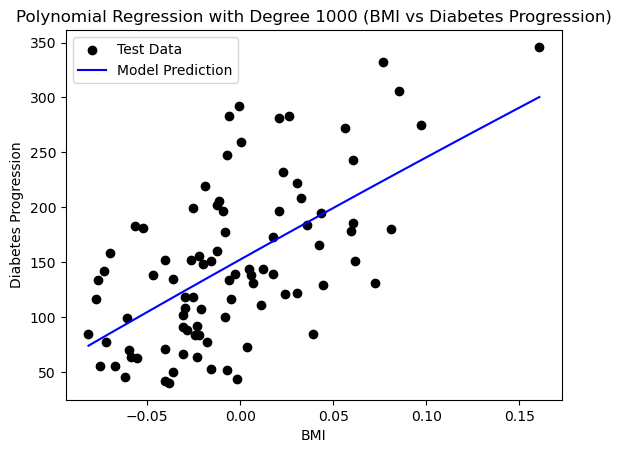

In [27]:
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

diabetes_X_new = diabetes_X[:,np.newaxis, 2] #하나의특징(BMI)만추려내서2차원배열로만든다. BMI 특징의인덱스가2이다.

X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size = 0.2) #학습데이터랑 테스트 데이터를 나눔 8:2 비율

degree = 2 #차수

model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())

model.fit(X_train, y_train) #학습데이터를 토대로 모델을 학습시킴

X_plot= np.linspace(X_test.min(),X_test.max(),50).reshape(-1, 1)
y_pred = model.predict(X_plot)



# print(diabetes_X_new)
# print(diabetes_y)
# print(diabetes_X)
plt.scatter(X_test, y_test, color='black', label='Test Data')  # 테스트 데이터
plt.plot(X_plot, y_pred, color='blue', label='Model Prediction')  # 모델 예측
plt.legend()
plt.title("Polynomial Regression with Degree 1000 (BMI vs Diabetes Progression)")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.show()

In [74]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

#미분치
def sigmoid_deriv(x):
    return x*(1-x)

learning_rate = 0.2

input = [[0,0],[0,1],[1,0],[1,1]]

targets = [1, 0, 0, 1]

#은닉층 1
w1_11 = 0.10
w1_21 = 0.30
b1_1 = 0.1
# 은닉층 2
w1_12 = 0.10
w1_22 = 0.30
b1_2 = 0.1

# 은닉층 2
w1_13 = 0.10
w1_23 = 0.30
b1_3 = 0.1

#출력층
w2_11 = 0.50
w2_21 = 0.60
w2_31 = 0.30
b2 = 0.3


def forward(x):
    global w1_11 ,w1_21 ,b1_1 , w1_12 , w1_22, b1_2, w1_13 , w1_23, b1_3, w2_11 ,w2_21 ,w2_31 ,b2
    print(x1 , x2)
    x1 , x2 =x
    z1 = x1 * w1_11+ x2 * w1_21 + b1_1
    a1 = sigmoid(z1)

    z2 = x1 * w1_12+ x2 * w1_22 + b1_2
    a2 = sigmoid(z2)

    z3 = x1 * w1_13+ x2 * w1_23 + b1_3
    a3 = sigmoid(z3)

    z_out = a1 * w2_11 + a2 * w2_21+ a3 * w2_31 + b2
    a_out =sigmoid(z_out)
    print(z1,z2,z3)
    return a1, a2 , a3, a_out

def backward(x, target ,a1, a2 , a3, a_out):
    global w1_11 ,w1_21 ,b1_1 , w1_12 , w1_22, b1_2, w1_13 , w1_23, b1_3, w2_11 ,w2_21 ,w2_31 ,b2

    x1, x2 = x
    error = a_out - target
    delta_out = error * sigmoid_deriv(a_out)

    delta1 = delta_out * w2_11 * sigmoid_deriv(a1)
    delta2 = delta_out * w2_21 * sigmoid_deriv(a2)
    delta3 = delta_out * w2_31 * sigmoid_deriv(a3)

    w2_11 -= learning_rate * a1 * delta_out
    w2_21 -= learning_rate * a2 * delta_out
    w2_31 -= learning_rate * a3 * delta_out
    b2 -= learning_rate * delta_out

    w1_11 -= learning_rate * x1 * delta1
    w1_21 -= learning_rate * x2 * delta1
    b1_1 -= learning_rate *delta1
    
    w1_12 -= learning_rate * x1 * delta1
    w1_22 -= learning_rate * x2 * delta1
    b1_2 -= learning_rate *delta1

    w1_13 -= learning_rate * x1 * delta1
    w1_23 -= learning_rate * x2 * delta1
    b1_3 -= learning_rate *delta1
    
    

In [67]:
import numpy as np
#은닉층과 출력층의 손실함수 적용 결과에 따른 가중치 수정을 설명

#시그모이드 함수

def actf(x):
    return 1/(1+np.exp(-x))

#미분치
def actf_deriv(x):
    return x*(1-x)

inputs, hiddens, outputs = 2, 2, 1

leraning_rate = 0.2

X = np.array([[0,0],[0,1],[1,0],[1,1]]) #샘플
T = np.array([[0],[1],[0],[1]]) #정답

#가중치
W1 = np.array([[0.1, 0.2],[0.3, 0.4]])
B1 = np.array([[0.1, 0.2]])
W2 = np.array([[0.5],[0.6]])
B2 = np.array([0.3])

def predict(x):
    layer0 = x  #입력을 layer0에 대입
    Z1 = np.dot(layer0, W1) + B1  #행렬의 곱 계산
    layer1 = actf(Z1)
    Z2 = np.dot(layer1, W2) + B2
    layer2 = actf(Z2)
    return layer0, layer1, layer2

#역전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(10):
        for x, y in zip(X, T):
            x = np.reshape(x,(1, -1))
            y = np.reshape(y,(1, -1))

            layer0, layer1, layer2 = predict(x)
            #print(layer0, layer1, layer2)
            layer2_error = layer2-y
            #print(layer2_error)
            layer2_delta = layer2_error*actf_deriv(layer2) #기울기를 계산
            #print(layer2_delta)
            #print(W2.T)
            layer1_error = np.dot(layer2_delta, W2.T)
            #print(layer1_error)
            layer1_delta = layer1_error*actf_deriv(layer1)

            W2 += -leraning_rate*np.dot(layer1.T,layer2_delta)
            W1 += -leraning_rate*np.dot(layer0.T,layer1_delta)
            B2 += -leraning_rate*np.sum(layer2_delta,axis=0)
            B1 += -leraning_rate*np.sum(layer1_delta,axis=0)

def test():
    for x, y in zip(X, T): #X와 T에서 하나씩 가져온다
        x = np.reshape(x, (1, -1))	# 하나의 샘플을 꺼내서 2차원 행렬로 만든다. 
        layer0, layer1, layer2 = predict(x)
        print(layer0, layer1, layer2)
        print(x, y, layer2)		# 출력층의 값을 출력해본다. 

fit()
test()
                                                
            
            
    


    


    


[[0 0]] [[0.51641875 0.53919107]] [[0.60849389]]
[[0 0]] [0] [[0.60849389]]
[[0 1]] [[0.59728802 0.64336071]] [[0.62678539]]
[[0 1]] [1] [[0.62678539]]
[[1 0]] [[0.53707767 0.58314083]] [[0.61508966]]
[[1 0]] [0] [[0.61508966]]
[[1 1]] [[0.61705402 0.68321243]] [[0.63274475]]
[[1 1]] [1] [[0.63274475]]
